In [1]:
# imports

import numpy
import scipy
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [6]:
def scaled_images (image, *args, **kwargs):
    #default values
    scale_factor = kwargs.get('scale_factor', 2)
    n_scales = kwargs.get('n_scales', 5)
    sig = kwargs.get('sigma',  (2 * scale_factor / 6.0) )
    
    # import image 
    img = mpimg.imread(image)
    yM, xN= img.shape
  
    # output image 
    pyramidImg = numpy.zeros( (yM, (2 * xN)) )
    pyramidImg[0:yM, 0:xN] = img #origional input image 
    pyramidEdge = numpy.zeros( (yM, (2 * xN)) )
    
    smallImg = img
    prevY, prevX = 0, xN    
    for x in range(n_scales): 
        # removes high frequency component of the image
        imgGaus = gaussian_filter(smallImg, sigma=sig) 
        # down sample
        imgDown = imgGaus[::scale_factor, ::scale_factor]
        # display, place in pyramidImg with offset
        smallY, smallX = imgDown.shape
        smallY = smallY + prevY
        smallX = smallX + xN
        pyramidImg[prevY:smallY,xN:smallX] = imgDown 
        sobelP 
        prevY = smallY
        smallImg = imgDown
        
    pyramid = plt.imshow(pyramidImg, cmap='gray',interpolation='nearest')
    
    return pyramidImg

In [7]:
def sobelP (img, pyramidEd):
    sobelX = ndimage.sobel(img, 0)  # horizontal derivative 
    sobelY = ndimage.sobel(img, 1)  # vertical derivative 
    sobelMag = numpy.hypot(sobelX, sobelY)  # magnitude 
    sobelMag *= 255.0 / numpy.max(sobelMag)  # normalize (Q&D) 
    plt.imshow(sobelMag, cmap='gray') 
    # plt.imsave('butterfly _pyramid_edges.jpg', sobelMag, cmap='gray') 
    pyramidEd[prevY:smallY,xN:smallX] = sobelMag
    return sobelMag

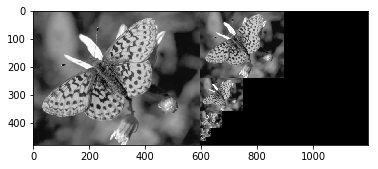

In [8]:
scale1 = scaled_images('butterfly.png')

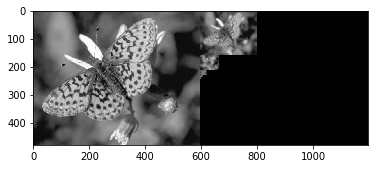

In [4]:
scale2 = scaled_images('butterfly.png', scale_factor=3, n_scales=10, sigma=5)